## Credit Card Fraud Detection Both Supervised and Unsupervised Algorithms

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import multivariate_normal
from numpy.random import seed
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
seed(42)
import os
from sklearn import preprocessing
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve, precision_recall_curve, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, silhouette_score

import time
import warnings
warnings.filterwarnings("ignore")


### Importing preprocessed data

In [2]:
X_resample= pd.read_csv('X.csv')
y_resample= pd.read_csv('y.csv')
df= X_resample
df['Class']= y_resample

In [3]:
y_resample= y_resample['Class']
counter = Counter(y_resample)
print(counter)

Counter({0: 284315, 1: 284315})


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.3)

In [5]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [6]:
print("length of X_train:: ",len(X_train))
print("length of y_train:: ",len(y_train))
print("length of X_test:: ",len(X_test))
print("length of y_test:: ",len(y_test))

length of X_train::  398041
length of y_train::  398041
length of X_test::  170589
length of y_test::  170589


In [7]:
def RFC(data):
    classifier = RandomForestClassifier()

    y= data['Class']
    x= data.drop(columns=['Class'],axis=1)
    x_train_RFC,x_test_RFC,y_train_RFC,y_test_RFC = train_test_split(x,y,test_size= 0.3,random_state=0)
    start = time.process_time()
    class_names = {0: 'Not Fraud', 1: 'Fraud'}

    classifier = RandomForestClassifier(n_estimators=25,criterion='entropy', random_state=42,max_depth=10,class_weight='balanced')
    classifier.fit(x_train_RFC,y_train_RFC)
    print("time taken by RFC is :",time.process_time() - start)
    y_pred_RFC = classifier.predict(x_test_RFC)
    print('Classifcation report:\n', classification_report(y_test_RFC, y_pred_RFC))

    from sklearn.metrics import f1_score, recall_score
    matrix = confusion_matrix(y_pred=y_pred_RFC, y_true=y_test_RFC)
    # Create pandas dataframe
    dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)


    fig, ax = plt.subplots(1, 2, figsize=(24,5))

    sns.heatmap(matrix, ax=ax[0], annot=True, cmap="Blues")
    ax[0].set_title("Confusion Matrix")
    ax[0].set_xlabel("Prediction")
    ax[0].set_ylabel("Actual")

    precision, recall, _ = precision_recall_curve(y_test_RFC,y_pred_RFC)
    ax[1].plot(recall, precision)
    ax[1].set_title("Precision-recall Curve")
    ax[1].set_xlabel("Recall")
    ax[1].set_ylabel("Precision")
    plt.show()


    f1_score = round(f1_score(y_test_RFC, y_pred_RFC), 2)
    recall_score = round(recall_score(y_test_RFC, y_pred_RFC), 2)
    print("Sensitivity/Recall for RFC Model 1 : {recall_score}".format(recall_score = recall_score))
    print("F1 Score for RFC Model 1 : {f1_score}".format(f1_score = f1_score))
    print("accuracy of the RFC model is: ",accuracy_score(y_pred=y_pred_RFC, y_true=y_test_RFC)*100)


In [8]:
def SVC(data):
    data= data.sample(100000)
    from sklearn import svm

    y= data['Class']
    x= data.drop(columns=['Class'],axis=1)
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3,random_state=0)
    start = time.process_time()
    class_names = {0: 'Not Fraud', 1: 'Fraud'}

    classifier= svm.SVC(kernel= 'linear')
    classifier.fit(x_train,y_train)
    print("time taken by SVC is :",time.process_time() - start)
    y_pred = classifier.predict(x_test)
    print('Classifcation report:\n', classification_report(y_test, y_pred))

    from sklearn.metrics import f1_score, recall_score
    matrix = confusion_matrix(y_pred=y_pred, y_true=y_test)
    
    dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)


    fig, ax = plt.subplots(1, 2, figsize=(24,5))

    sns.heatmap(matrix, ax=ax[0], annot=True, cmap="Blues")
    ax[0].set_title("Confusion Matrix")
    ax[0].set_xlabel("Prediction")
    ax[0].set_ylabel("Actual")

    precision, recall, _ = precision_recall_curve(y_test,y_pred)
    ax[1].plot(recall, precision)
    ax[1].set_title("Precision-recall Curve")
    ax[1].set_xlabel("Recall")
    ax[1].set_ylabel("Precision")
    plt.show()


    f1_score = round(f1_score(y_test, y_pred), 2)
    recall_score = round(recall_score(y_test, y_pred), 2)
    print("Sensitivity/Recall for RFC Model 1 : {recall_score}".format(recall_score = recall_score))
    print("F1 Score for RFC Model 1 : {f1_score}".format(f1_score = f1_score))
    print("accuracy of the RFC model is: ",accuracy_score(y_pred=y_pred, y_true=y_test)*100)


In [9]:
state = 1
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X_resample),
                                        contamination=0.5,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=0.5)
}

outlier = pd.DataFrame()

### Combining supervised and Unsupervised

In [10]:
from pyod.models.copod import COPOD
clf = COPOD()
clf.fit(X_resample)
c = clf.decision_function(X_resample)
print(c)


[34.73022539 33.1415765  45.36832386 ... 32.84251245 53.3792273
 44.28331609]


### COPOD + RFC

time taken by RFC is : 108.30474082100002
Classifcation report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     85172
           1       1.00      0.98      0.99     85417

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589



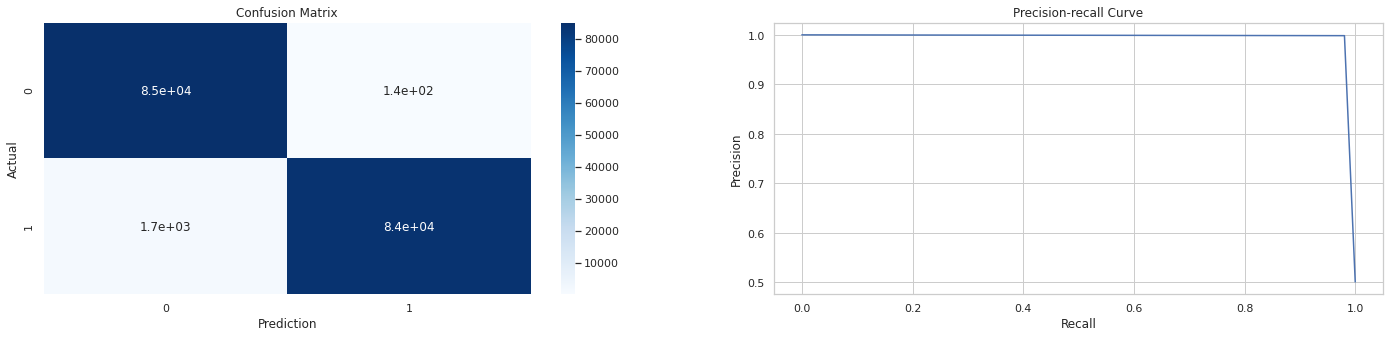

Sensitivity/Recall for RFC Model 1 : 0.98
F1 Score for RFC Model 1 : 0.99
accuracy of the RFC model is:  98.94483231626893


In [11]:
df['score']=c
outlier['copod']=c
RFC(df)

### COPOD + SVC

time taken by SVC is : 240.28090565499997
Classifcation report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     15104
           1       0.98      0.93      0.95     14896

    accuracy                           0.96     30000
   macro avg       0.96      0.96      0.96     30000
weighted avg       0.96      0.96      0.96     30000



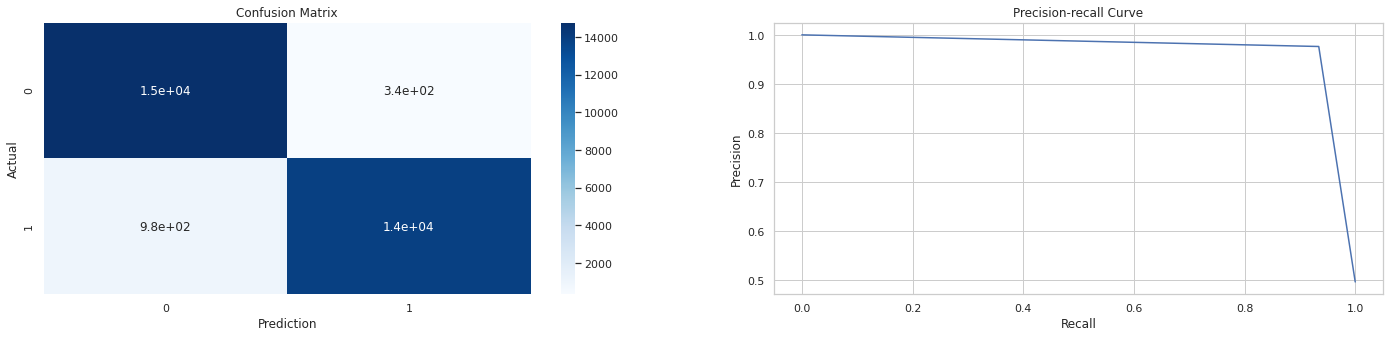

Sensitivity/Recall for RFC Model 1 : 0.93
F1 Score for RFC Model 1 : 0.95
accuracy of the RFC model is:  95.6


In [12]:
SVC(df)
del df['score']

### IForest + RFC

time taken by RFC is : 100.99707146599997
Classifcation report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     85172
           1       1.00      0.98      0.99     85417

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589



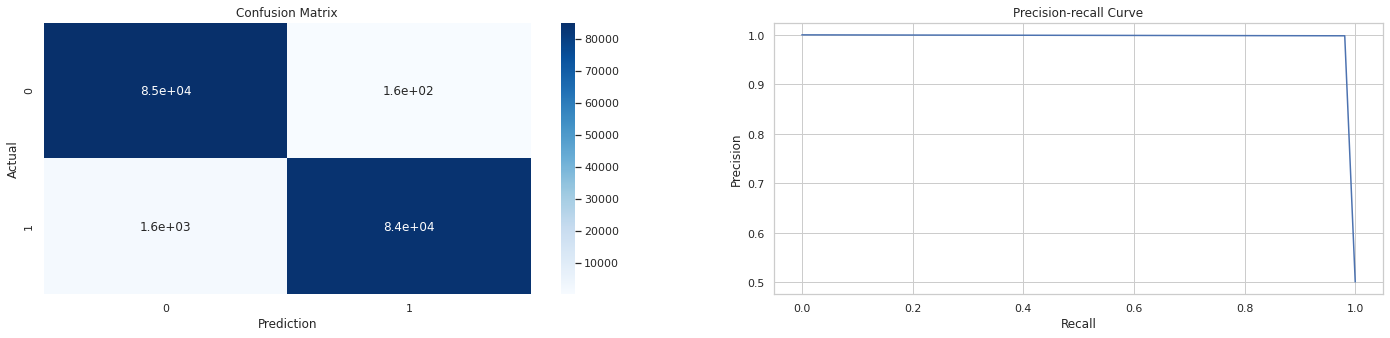

Sensitivity/Recall for RFC Model 1 : 0.98
F1 Score for RFC Model 1 : 0.99
accuracy of the RFC model is:  98.9577288101812


In [13]:
from pyod.models.iforest import IForest
clf = IForest()
clf.fit(X_resample)
c = clf.decision_function(X_resample) 
df['score']=c
outlier['iforest']=c
RFC(df)

### IForest + SVC

time taken by SVC is : 322.40123001100005
Classifcation report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     14921
           1       0.97      0.92      0.95     15079

    accuracy                           0.95     30000
   macro avg       0.95      0.95      0.95     30000
weighted avg       0.95      0.95      0.95     30000



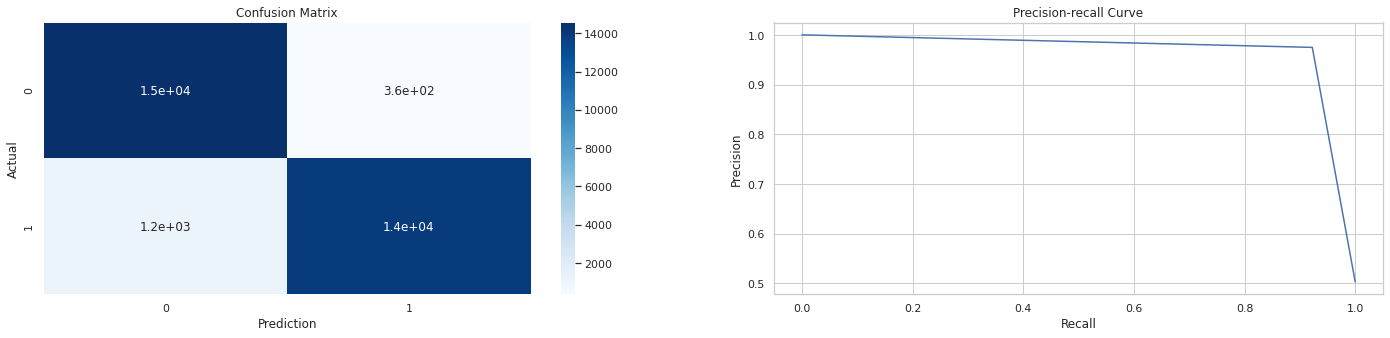

Sensitivity/Recall for RFC Model 1 : 0.92
F1 Score for RFC Model 1 : 0.95
accuracy of the RFC model is:  94.89999999999999


In [14]:
SVC(df)
del df['score']

### CBLOF + RFC

In [ ]:
from pyod.models.cblof import CBLOF
clf = CBLOF()
clf.fit(X_resample)

c = clf.decision_function(X_resample) 
df['score']=c
outlier['cblof']=c
RFC(df)

### CBLOF + SVC

In [ ]:
SVC(df)
del df['score']

### HBOS + RFC

In [ ]:
from pyod.models.hbos import HBOS
clf = HBOS()
clf.fit(X_resample)

c = clf.decision_function(X_resample) 
df['score']=c
outlier['hbos']=c
RFC(df)

### HBOS + SVC

In [ ]:
SVC(df)
del df['score']

### All Unsupervised + RFC

In [ ]:
#combining all outliers
result = pd.concat([df, outlier], axis=1)
RFC(result)

### All Unsupervised + SVC

In [ ]:
SVC(result)